In [11]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import re

from datetime import datetime 
from collections import defaultdict
from scipy.stats import pearsonr

In [12]:
#create a pandas dataframes from csv files
users = pd.read_csv('users.csv')
tweets = pd.read_csv('tweets.csv')

In [13]:
users.info()
users.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11508 entries, 0 to 11507
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              11508 non-null  int64  
 1   name            11507 non-null  object 
 2   lang            11508 non-null  object 
 3   bot             11508 non-null  int64  
 4   created_at      11508 non-null  object 
 5   statuses_count  11109 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 539.6+ KB


id                  int64
name               object
lang               object
bot                 int64
created_at         object
statuses_count    float64
dtype: object

In [14]:
tweets.info()
tweets.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13664696 entries, 0 to 13664695
Data columns (total 10 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   id              object
 1   user_id         object
 2   retweet_count   object
 3   reply_count     object
 4   favorite_count  object
 5   num_hashtags    object
 6   num_urls        object
 7   num_mentions    object
 8   created_at      object
 9   text            object
dtypes: object(10)
memory usage: 1.0+ GB


id                object
user_id           object
retweet_count     object
reply_count       object
favorite_count    object
num_hashtags      object
num_urls          object
num_mentions      object
created_at        object
text              object
dtype: object

## Trasformazione delle colonne in tipi

In [15]:
tweets['id'] = pd.to_numeric(tweets['id'], errors='coerce')
tweets['user_id'] = pd.to_numeric(tweets['user_id'], errors='coerce')
tweets['retweet_count'] = pd.to_numeric(tweets['retweet_count'], errors='coerce')
tweets['reply_count'] = pd.to_numeric(tweets['reply_count'], errors='coerce')
tweets['favorite_count'] = pd.to_numeric(tweets['favorite_count'], errors='coerce')
tweets['num_hashtags'] = pd.to_numeric(tweets['num_hashtags'], errors='coerce')
tweets['num_mentions'] = pd.to_numeric(tweets['num_mentions'], errors='coerce')
tweets['num_urls'] = pd.to_numeric(tweets['num_urls'], errors='coerce')
tweets['created_at'] = pd.to_datetime(tweets['created_at'], errors='coerce')

users['id'] = pd.to_numeric(users['id'], errors='coerce')
users['created_at'] = pd.to_datetime(users['created_at'], errors='coerce')

In [16]:
users.lang.unique()

array(['en', 'it', 'fr', 'ru', 'es', 'tr', 'en-gb', 'pt', 'nl', 'id',
       'zh-tw', 'ja', 'de', 'ko', 'en-AU', 'da', 'ar', 'en-GB',
       'Select Language...', 'zh-TW', 'zh-cn', 'pl', 'el', 'fil', 'sv',
       'xx-lc'], dtype=object)

In [17]:
tweets['retweet_count'] = tweets['retweet_count'].abs()
tweets['reply_count'] = tweets['reply_count'].abs()
tweets['favorite_count'] = tweets['favorite_count'].abs()
tweets['num_hashtags'] = tweets['num_hashtags'].abs()
tweets['num_mentions'] = tweets['num_mentions'].abs()
tweets['num_urls'] = tweets['num_urls'].abs()

users['statuses_count'] = users['statuses_count'].abs()

## User analysis 

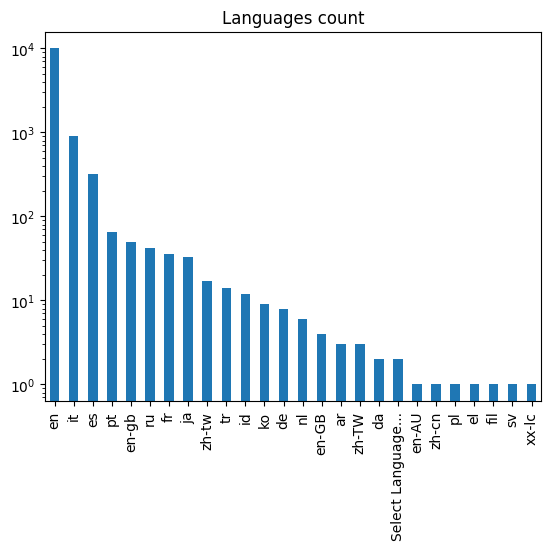

In [18]:
users['lang'].value_counts().plot(kind='bar', title='Languages count')
plt.yscale('log')
plt.show()

#### Lang Analysis

/var/folders/h4/5wp1mt_n1k72n6zcf7wxd6bc0000gn/T/ipykernel_10417/2716921091.py:10: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  text_nal = tweets.merge(nal, on='user_id')


,id,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text,name,lang,bot,subscribing_date,statuses_count
0,4.912745e+17,2.955215e+07,0.0,0.0,0.0,0.0,0.0,0.0,2019-07-23 17:32:30,"Spent the majority of my day drawing around, c...",Chloe,xx-lc,0,2014-04-09 21:36:02,15398.0
1,4.886930e+17,2.955215e+07,0.0,0.0,0.0,0.0,0.0,0.0,2019-07-16 14:34:25,We all love dem cuddles. http://t.co/fPrcnUfacS,Chloe,xx-lc,0,2014-04-09 21:36:02,15398.0
2,4.854109e+17,2.955215e+07,0.0,0.0,0.0,0.0,0.0,0.0,2019-07-07 13:12:33,Dog sitting until 8 tonight. Again..,Chloe,xx-lc,0,2014-04-09 21:36:02,15398.0
3,1.683542e+15,2.955215e+07,0.0,NaN,0.0,NaN,0.0,NaN,2019-07-16 20:58:50,NaN,Chloe,xx-lc,0,2014-04-09 21:36:02,15398.0
4,7.055459e+09,2.955215e+07,NaN,0.0,NaN,0.0,0.0,0.0,2020-02-27 20:17:18,The chocolate is soooooooooooo amazing.,Chloe,xx-lc,0,2014-04-09 21:36:02,15398.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2557,5.939970e+17,2.956614e+09,0.0,0.0,0.0,0.0,1.0,0.0,2020-05-02 04:35:05,I think even super heroes should rest at weeke...,Leanne Arker,select language...,0,2020-01-05 00:09:59,57.0
2558,5.939942e+17,2.956614e+09,0.0,0.0,1.0,0.0,1.0,1.0,2020-05-02 04:23:46,Another one for our files @Ruckdie https://t....,Leanne Arker,select language...,0,2020-01-05 00:09:59,57.0
2559,5.811560e+17,2.956614e+09,3.0,0.0,0.0,0.0,0.0,2.0,2020-03-27 18:09:19,RT @laura_macd3: Cartoon Paddy in the Dom Post...,Leanne Arker,select language...,0,2020-01-05 00:09:59,57.0
2560,7.268000e+16,2.956614e+09,NaN,0.0,1.0,0.0,NaN,3.0,2020-05-01 19:38:48,@annabf @CampbellLiveNZ @UniteUnion well done,Leanne Arker,select language...,0,2020-01-05 00:09:59,57.0


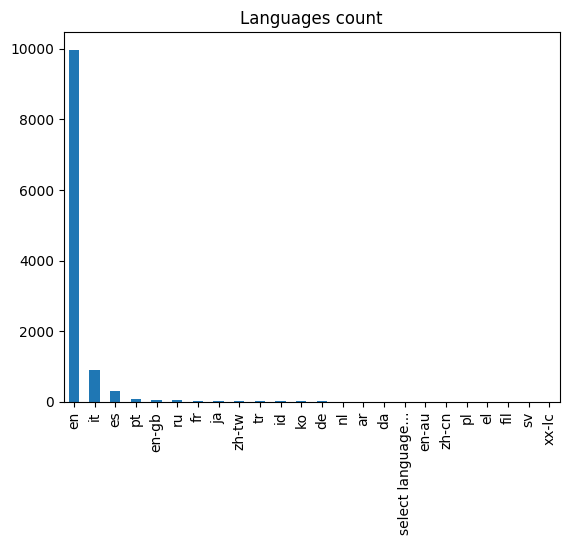

In [19]:
users['lang'] = users['lang'].str.lower()
users['lang'].value_counts().plot(kind='bar', title='Languages count')

users.rename(columns={
    'id' : 'user_id',
    'created_at' : 'subscribing_date'
}, inplace=True)
nal = users[(users['lang'] == 'select language...') | (users['lang'] == 'xx-lc')]

text_nal = tweets.merge(nal, on='user_id')
text_nal

In [20]:
text_nal[text_nal['name'] == 'Leanne Arker']

,id,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text,name,lang,bot,subscribing_date,statuses_count
2484,5.866970e+17,2.956614e+09,0.0,0.0,0.0,0.0,0.0,1.0,2020-04-12 01:07:12,@bernardchickey I've heard of something called...,Leanne Arker,select language...,0,2020-01-05 00:09:59,57.0
2485,5.601363e+17,2.956614e+09,13933.0,0.0,0.0,0.0,0.0,2.0,2020-01-29 18:04:45,RT @stephenfry: If physical diseases were trea...,Leanne Arker,select language...,0,2020-01-05 00:09:59,57.0
2486,5.751565e+17,2.956614e+09,0.0,0.0,0.0,0.0,0.0,1.0,2020-03-11 04:49:27,@Hilary_Barry Gives new meaning to the term sl...,Leanne Arker,select language...,0,2020-01-05 00:09:59,57.0
2487,NaN,2.956614e+09,9.0,0.0,0.0,NaN,NaN,NaN,2020-03-26 19:04:58,NaN,Leanne Arker,select language...,0,2020-01-05 00:09:59,57.0
2488,5.925147e+17,2.956614e+09,253.0,0.0,0.0,1.0,0.0,1.0,2020-04-28 02:24:59,RT @philipreeve: Help. If you c medal tweet me...,Leanne Arker,select language...,0,2020-01-05 00:09:59,57.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2557,5.939970e+17,2.956614e+09,0.0,0.0,0.0,0.0,1.0,0.0,2020-05-02 04:35:05,I think even super heroes should rest at weeke...,Leanne Arker,select language...,0,2020-01-05 00:09:59,57.0
2558,5.939942e+17,2.956614e+09,0.0,0.0,1.0,0.0,1.0,1.0,2020-05-02 04:23:46,Another one for our files @Ruckdie https://t....,Leanne Arker,select language...,0,2020-01-05 00:09:59,57.0
2559,5.811560e+17,2.956614e+09,3.0,0.0,0.0,0.0,0.0,2.0,2020-03-27 18:09:19,RT @laura_macd3: Cartoon Paddy in the Dom Post...,Leanne Arker,select language...,0,2020-01-05 00:09:59,57.0
2560,7.268000e+16,2.956614e+09,NaN,0.0,1.0,0.0,NaN,3.0,2020-05-01 19:38:48,@annabf @CampbellLiveNZ @UniteUnion well done,Leanne Arker,select language...,0,2020-01-05 00:09:59,57.0


Visti i tweet tutti so inglesi

In [21]:
users['lang'].replace('select language...', 'en', inplace=True)
users['lang'].replace('xx-lc', 'en', inplace=True)

### Bot Analysis

Check if there are only 0 and 1 values

In [22]:
users.bot.unique()

array([1, 0])

### Statues Count analysis

Calculate for each user how much tweets we have in tweets.csv

In [23]:

count = tweets.groupby('user_id', as_index=False)['user_id'].count()

#cnt['count'] = tweets.groupby(by='user_id', as_index=False, dropna=False)['user_id'].count()
c = users
c.sort_values('user_id')
c['count'] = count
c['statuses_count'].sum() - c['count'].sum()

#max = tweets.groupby('user_id', as_index=False).count()
#max['max'] = max.max(axis=0)
#max

53176053.0

In [24]:
c['count'].median()

152.0

### User's created at analysis (previously we changed the name of the attribute in 'subscribing_date')

In [25]:
users[users['subscribing_date'] > datetime.now()]

,user_id,name,lang,bot,subscribing_date,statuses_count,count


In [26]:
users[users['subscribing_date'] < datetime.strptime("2006-07-15 00:00:00", "%Y-%m-%d %H:%M:%S")]

,user_id,name,lang,bot,subscribing_date,statuses_count,count


Non cene di timestamp sbagliati in italia

### Resulting Plots

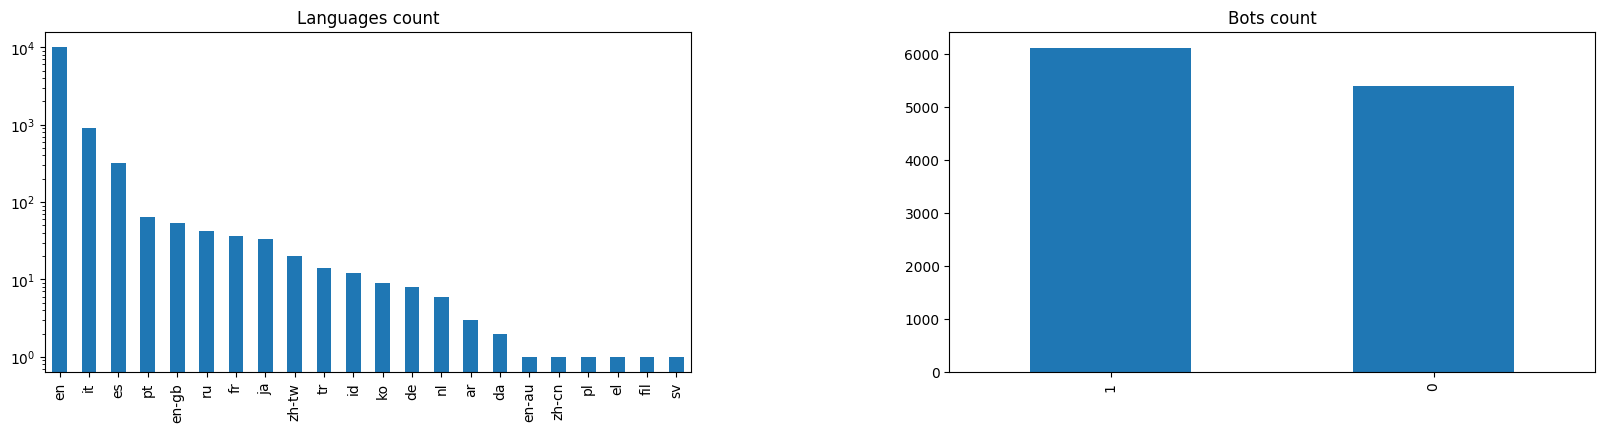

In [27]:
fig = plt.figure(figsize=(20,23))
fig_dims = (4,2)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

###fig 1
plt.subplot2grid(fig_dims, (0,0))
users['lang'].value_counts().plot(kind='bar', title='Languages count')
plt.yscale('log')

###fig 2
plt.subplot2grid(fig_dims, (0,1))
users['bot'].value_counts().plot(kind='bar', title='Bots count')

plt.show()

## Tweets Analysis

### Drop duplicates

In [28]:
count = tweets['id'].count()
tweets.drop_duplicates(inplace=True)
print("Dropped " + str(count - tweets['id'].count()) + " duplicates")

Dropped 1952099 duplicates


### Replace NaN and 'inf' values in 'id'

In [29]:
tweets[(tweets['id'].isna() == True) | (tweets['id'] == 'inf')]

,id,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
32,NaN,2.214453e+09,1.0,0.0,2.0,NaN,NaN,NaN,2019-01-18 01:13:23,NaN
60,NaN,1.532124e+07,NaN,NaN,NaN,NaN,0.0,2.0,2016-03-07 03:40:53,@abc7 @CharlieSheen Anything he says can and w...
71,NaN,5.224195e+08,0.0,NaN,0.0,NaN,0.0,NaN,2019-10-15 13:18:57,NaN
161,NaN,2.211927e+09,0.0,NaN,NaN,NaN,NaN,NaN,2020-01-29 00:24:20,NaN
183,NaN,1.241381e+09,0.0,NaN,0.0,0.0,0.0,2.0,2020-03-02 12:39:07,@Shpuld @GavinEdgington Also I often aligned t...
...,...,...,...,...,...,...,...,...,...,...
13664598,NaN,6.167795e+08,NaN,0.0,0.0,0.0,0.0,0.0,2018-01-31 09:36:49,eeennyyyaaakkk aku lapar :&amp;
13664602,NaN,7.744123e+07,0.0,NaN,0.0,0.0,0.0,2.0,2019-05-11 06:32:22,@tapujaveri @Sam_Kerwood OMG! What a coinciden...
13664634,NaN,8.485836e+08,0.0,0.0,8.0,0.0,0.0,NaN,2020-04-15 13:22:15,10 days.........just ten days ☀️
13664652,NaN,7.986130e+08,17.0,0.0,NaN,1.0,0.0,1.0,2020-04-13 16:35:53,RT @krisvoakes: This is completely embarrassin...


In [30]:
tweets.loc[(tweets['id'].isna() == True) , 'id'] = -1
tweets.loc[(tweets['id'] == 'inf'), 'id'] = -1
tweets[tweets['id'] == -1]

,id,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
32,-1.0,2.214453e+09,1.0,0.0,2.0,NaN,NaN,NaN,2019-01-18 01:13:23,NaN
60,-1.0,1.532124e+07,NaN,NaN,NaN,NaN,0.0,2.0,2016-03-07 03:40:53,@abc7 @CharlieSheen Anything he says can and w...
71,-1.0,5.224195e+08,0.0,NaN,0.0,NaN,0.0,NaN,2019-10-15 13:18:57,NaN
161,-1.0,2.211927e+09,0.0,NaN,NaN,NaN,NaN,NaN,2020-01-29 00:24:20,NaN
183,-1.0,1.241381e+09,0.0,NaN,0.0,0.0,0.0,2.0,2020-03-02 12:39:07,@Shpuld @GavinEdgington Also I often aligned t...
...,...,...,...,...,...,...,...,...,...,...
13664598,-1.0,6.167795e+08,NaN,0.0,0.0,0.0,0.0,0.0,2018-01-31 09:36:49,eeennyyyaaakkk aku lapar :&amp;
13664602,-1.0,7.744123e+07,0.0,NaN,0.0,0.0,0.0,2.0,2019-05-11 06:32:22,@tapujaveri @Sam_Kerwood OMG! What a coinciden...
13664634,-1.0,8.485836e+08,0.0,0.0,8.0,0.0,0.0,NaN,2020-04-15 13:22:15,10 days.........just ten days ☀️
13664652,-1.0,7.986130e+08,17.0,0.0,NaN,1.0,0.0,1.0,2020-04-13 16:35:53,RT @krisvoakes: This is completely embarrassin...


### Replace wrong values in 'user_id'

In [31]:
len(tweets[(tweets['user_id'].isna() == True)])

433894

In [32]:
tweets.loc[(tweets['user_id'].isna() == True), 'user_id'] = -1
len(tweets[(tweets['user_id'].isna() == True)])

0

### Infer num_hashtags, num_urls and num_mentions

In [33]:
tweets['infer_hashtags'] = tweets.text.str.count('#')
tweets['infer_mentions'] = tweets.text.str.count('@')
tweets['infer_urls'] = tweets.text.str.count('http://')

print("num_hashtags nan: " + str(tweets['num_hashtags'].isna().sum()) + \
      " num_mentions nan: " + str(tweets['num_mentions'].isna().sum()) + \
      " num_urls nan: " + str(tweets['num_mentions'].isna().sum()))

tweets['num_hashtags'] = tweets['num_hashtags'].fillna(tweets['infer_hashtags'])
tweets['num_mentions'] = tweets['num_mentions'].fillna(tweets['infer_mentions'])
tweets['num_urls'] = tweets['num_urls'].fillna(tweets['infer_urls'])

print("num_hashtags nan: " + str(tweets['num_hashtags'].isna().sum()) + \
      " num_mentions nan: " + str(tweets['num_mentions'].isna().sum()) + \
      " num_urls nan: " + str(tweets['num_mentions'].isna().sum()))


num_hashtags nan: 1163675 num_mentions nan: 987988 num_urls nan: 987988
num_hashtags nan: 489183 num_mentions nan: 488513 num_urls nan: 488513


### Replace NaN values in tweets

In [34]:
t = tweets
user_median = t.groupby('user_id', as_index=False).median()
user_median.rename(columns={
    'retweet_count' : 'retweet_median',
    'reply_count' : 'reply_median',
    'favorite_count' : 'favorite_median',
    'num_hashtags' : 'hashtags_median',
    'num_urls' : 'urls_median',
    'num_mentions' : 'mentions_median'
}, inplace=True)
user_median.drop(columns=['id'], inplace=True)
tweets = t.merge(user_median, on='user_id')

print("retweet_count nan: " + str(tweets['retweet_count'].isna().sum()) + \
      ", reply_count nan: " + str(tweets['reply_count'].isna().sum()) + \
      ", favorite_count nan: " + str(tweets['favorite_count'].isna().sum()) + \
      ", num_hashtags nan: " + str(tweets['num_hashtags'].isna().sum()) + \
      ", num_mentions nan: " + str(tweets['num_mentions'].isna().sum()) + \
      ", num_urls nan: " + str(tweets['num_urls'].isna().sum()))

#sostituzione valori
tweets['retweet_count'] = tweets['retweet_count'].fillna(tweets['retweet_median'])
tweets['reply_count'] = tweets['reply_count'].fillna(tweets['reply_median'])
tweets['favorite_count'] = tweets['favorite_count'].fillna(tweets['favorite_median'])
tweets['num_hashtags'] = tweets['num_hashtags'].fillna(tweets['hashtags_median'])
tweets['num_mentions'] = tweets['num_mentions'].fillna(tweets['mentions_median'])
tweets['num_urls'] = tweets['num_urls'].fillna(tweets['urls_median'])

tweets = tweets.drop(columns=['retweet_median', 'reply_median', 'favorite_median', 'hashtags_median', 'mentions_median', 'urls_median'])

print("retweet_count nan: " + str(tweets['retweet_count'].isna().sum()) + \
      ", reply_count nan: " + str(tweets['reply_count'].isna().sum()) + \
      ", favorite_count nan: " + str(tweets['favorite_count'].isna().sum()) + \
      ", num_hashtags nan: " + str(tweets['num_hashtags'].isna().sum()) + \
      ", num_mentions nan: " + str(tweets['num_mentions'].isna().sum()) + \
      ", num_urls nan: " + str(tweets['num_urls'].isna().sum()))


/var/folders/h4/5wp1mt_n1k72n6zcf7wxd6bc0000gn/T/ipykernel_10417/2978870248.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  user_median = t.groupby('user_id', as_index=False).median()


retweet_count nan: 625456, reply_count nan: 809503, favorite_count nan: 808097, num_hashtags nan: 489183, num_mentions nan: 488513, num_urls nan: 309382
retweet_count nan: 158, reply_count nan: 257, favorite_count nan: 247, num_hashtags nan: 170, num_mentions nan: 170, num_urls nan: 88


### Replacing invalid timestamp

In [35]:
tweets.loc[(tweets.created_at < datetime.strptime("2006-07-15 00:00:00", "%Y-%m-%d %H:%M:%S")) | (tweets.created_at > datetime.now()),\
     'created_at'] = datetime.strptime("2000-01-01 00:00:00", "%Y-%m-%d %H:%M:%S")
tweets[tweets['created_at'] == datetime.strptime("2000-01-01 00:00:00", "%Y-%m-%d %H:%M:%S")]['id'].count()

97605

### Summing parameters in users (likes received, retweet and reply received)

In [36]:
new_users = users.merge(tweets.groupby('user_id').sum(), on='user_id')
new_users = new_users.drop(columns=\
    ['infer_urls_x', 'infer_hashtags_y',	'infer_mentions_y',\
    'infer_urls_y', 'infer_hashtags_x', 'infer_mentions_x', 'id']\
        )
new_users = new_users.rename(columns={
    'retweet_count' : 'retweet_received',
    'reply_count' : 'reply_received',
    'favorite_count' : 'favorite_received',
    'num_hashtags' : 'hashtag_used',
    'num_urls' : 'urls_used',
    'num_mentions' : 'mentions_used'}, 
    errors='raise'
)
new_users.head()

/var/folders/h4/5wp1mt_n1k72n6zcf7wxd6bc0000gn/T/ipykernel_10417/4118668035.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_users = users.merge(tweets.groupby('user_id').sum(), on='user_id')
/var/folders/h4/5wp1mt_n1k72n6zcf7wxd6bc0000gn/T/ipykernel_10417/4118668035.py:1: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  new_users = users.merge(tweets.groupby('user_id').sum(), on='user_id')


,user_id,name,lang,bot,subscribing_date,statuses_count,count,retweet_received,reply_received,favorite_received,hashtag_used,urls_used,mentions_used
0,2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76.0,8,5.0,0.0,5.0,13.0,0.0,37.0
1,2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,54.0,2,3.0,0.0,6.0,4.0,0.0,41.0
2,137959629,Dadan Syarifudin,en,1,2015-04-30 07:09:56,3.0,3,0.0,0.0,0.0,0.0,0.0,0.0
3,466124818,Carletto Focia,it,1,2017-01-18 02:49:18,50.0,2,1190.0,0.0,259.0,116.0,36.0,9.0
4,2571493866,MBK Ebook,en,0,2019-06-18 19:30:21,7085.0,1,62.0,0.0,226.0,479.0,3.0,1936.0


In [37]:

new_users[\
    (new_users['retweet_received'].isna() == True) |\
    (new_users['reply_received'].isna() == True) |\
    (new_users['favorite_received'].isna() == True) |\
    (new_users['hashtag_used'].isna() == True) |\
    (new_users['urls_used'].isna() == True) |\
    (new_users['mentions_used'].isna() == True)
        ].head()

,user_id,name,lang,bot,subscribing_date,statuses_count,count,retweet_received,reply_received,favorite_received,hashtag_used,urls_used,mentions_used
8358,201350011,Juan Harvey Vela B,es,1,2015-10-13 17:14:18,224.0,162,NaN,234.0,334.0,37.0,17.0,345.0
11325,466377491,Antonio Cava,it,1,2017-01-18 10:22:46,116.0,131,3836.0,NaN,438.0,112.0,33.0,15.0


In [38]:
new_users['reply_received'] = new_users['reply_received'].fillna(-1)
new_users['retweet_received'] = new_users['retweet_received'].fillna(-1)
new_users['statuses_count'] = new_users['statuses_count'].fillna(-1)

In [39]:
new_users['reply_received'] = new_users['reply_received'].astype(int)
new_users['retweet_received'] = new_users['retweet_received'].astype(int)
new_users['favorite_received'] = new_users['favorite_received'].astype(int)
new_users['hashtag_used'] = new_users['hashtag_used'].astype(int)
new_users['urls_used'] = new_users['urls_used'].astype(int)
new_users['mentions_used'] = new_users['mentions_used'].astype(int)
new_users['statuses_count'] = new_users['statuses_count'].astype(int)


In [40]:

new_users.head()

,user_id,name,lang,bot,subscribing_date,statuses_count,count,retweet_received,reply_received,favorite_received,hashtag_used,urls_used,mentions_used
0,2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76,8,5,0,5,13,0,37
1,2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,54,2,3,0,6,4,0,41
2,137959629,Dadan Syarifudin,en,1,2015-04-30 07:09:56,3,3,0,0,0,0,0,0
3,466124818,Carletto Focia,it,1,2017-01-18 02:49:18,50,2,1190,0,259,116,36,9
4,2571493866,MBK Ebook,en,0,2019-06-18 19:30:21,7085,1,62,0,226,479,3,1936


### Ratio

In [41]:
new_users['like/statuses'] = round(new_users['favorite_received'] / new_users['count'], 2)
new_users.head(3)

,user_id,name,lang,bot,subscribing_date,statuses_count,count,retweet_received,reply_received,favorite_received,hashtag_used,urls_used,mentions_used,like/statuses
0,2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76,8,5,0,5,13,0,37,0.62
1,2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,54,2,3,0,6,4,0,41,3.00
2,137959629,Dadan Syarifudin,en,1,2015-04-30 07:09:56,3,3,0,0,0,0,0,0,0.00


## Number of special char

In [42]:
special = '[(|!£$%&/=?^@#§,.;:-_<>ç@)]' # Define special characters
tweets['special'] = tweets['text'].str.count(special) # Count them
tweets['special'] = tweets['special'].fillna(0)
tweets['special'] = tweets['special'].astype(int)


## Lenght

In [43]:
tweets['text_lenght'] = tweets['text'].str.len()
tweets['text_lenght'] = tweets['text_lenght'].fillna(0)
tweets['text_lenght'] = tweets['text_lenght'].astype(int)


#### Merging

In [44]:
mean_tweets = tweets.groupby('user_id').mean(numeric_only=True)


In [45]:
mean_tweets = mean_tweets.drop(columns=['retweet_count', 'reply_count',\
    	'favorite_count', 'num_hashtags',\
        'num_urls',	'num_mentions',\
        'infer_hashtags_x',	'infer_mentions_x', 'infer_urls_x', 'infer_hashtags_y',\
        'infer_mentions_y', 'infer_urls_y', 'id'\
        ])



In [46]:

new_users = new_users.merge(mean_tweets, on='user_id')
new_users = new_users.rename(columns={'text_lenght':'avg_text_len', 'special':'avg_special'})


/var/folders/h4/5wp1mt_n1k72n6zcf7wxd6bc0000gn/T/ipykernel_10417/1105797597.py:1: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  new_users = new_users.merge(mean_tweets, on='user_id')


In [47]:
new_users.head(5)

,user_id,name,lang,bot,subscribing_date,statuses_count,count,retweet_received,reply_received,favorite_received,hashtag_used,urls_used,mentions_used,like/statuses,avg_special,avg_text_len
0,2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76,8,5,0,5,13,0,37,0.62,6.409091,62.227273
1,2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,54,2,3,0,6,4,0,41,3.00,5.188525,68.663934
2,137959629,Dadan Syarifudin,en,1,2015-04-30 07:09:56,3,3,0,0,0,0,0,0,0.00,4.750000,19.250000
3,466124818,Carletto Focia,it,1,2017-01-18 02:49:18,50,2,1190,0,259,116,36,9,129.50,7.768589,86.637943
4,2571493866,MBK Ebook,en,0,2019-06-18 19:30:21,7085,1,62,0,226,479,3,1936,226.00,6.928884,72.082057


In [48]:

new_users['avg_special'] = round(new_users['avg_special'], 2)
new_users['avg_text_len'] = round(new_users['avg_text_len'], 2)

In [49]:
new_users.head(5)

,user_id,name,lang,bot,subscribing_date,statuses_count,count,retweet_received,reply_received,favorite_received,hashtag_used,urls_used,mentions_used,like/statuses,avg_special,avg_text_len
0,2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76,8,5,0,5,13,0,37,0.62,6.41,62.23
1,2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,54,2,3,0,6,4,0,41,3.00,5.19,68.66
2,137959629,Dadan Syarifudin,en,1,2015-04-30 07:09:56,3,3,0,0,0,0,0,0,0.00,4.75,19.25
3,466124818,Carletto Focia,it,1,2017-01-18 02:49:18,50,2,1190,0,259,116,36,9,129.50,7.77,86.64
4,2571493866,MBK Ebook,en,0,2019-06-18 19:30:21,7085,1,62,0,226,479,3,1936,226.00,6.93,72.08


In [50]:
users = new_users

In [67]:
users[users['like/statuses'] == users['like/statuses'].max()]

,user_id,name,lang,bot,subscribing_date,statuses_count,count,retweet_received,reply_received,favorite_received,hashtag_used,urls_used,mentions_used,like/statuses,avg_special,avg_text_len
96,467116841,Gabriele Danno,it,1,2017-01-19 04:08:16,61,2,907,0,9223372036854775807,102,40,6,4.611686e+18,7.94,86.13


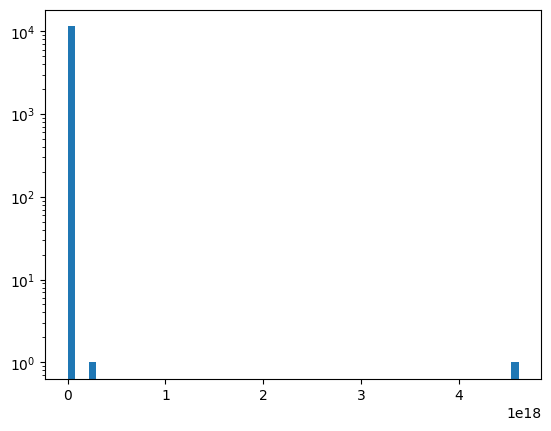

In [62]:
plt.hist(users['like/statuses'], bins=round(math.log2(users['like/statuses'].max()) + 1), log=True)
plt.show()